Action Performed!
Action Performed!
Action Performed!
Action Performed!
Action Performed!
Four

One

The Number of wins0
Action Performed!
Five

Three

The Number of wins1
Action Performed!
Four

Four

The Number of wins2
Action Performed!
Five

Two

The Number of wins3
Action Performed!
Three

Four

The Number of wins4
Action Performed!
Three

Four

The Number of wins5
Action Performed!
One

Two

The Number of wins6
Action Performed!
Six

Six

The Number of wins6
Action Performed!
Five

Two

The Number of wins7
Action Performed!
Five

Three

The Number of wins8
Pattern 2 Finished
Action Performed!
Action Performed!
Action Performed!
Action Performed!
Action Performed!
Two

One

The Number of wins9
Action Performed!
Two

One

The Number of wins9
Action Performed!
Three

Six

The Number of wins9
Action Performed!
Two

One

The Number of wins10
Action Performed!
Two

One

The Number of wins10
Action Performed!


KeyboardInterrupt: 

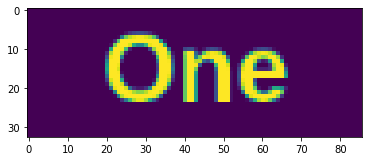

In [6]:
import pytesseract
import cv2
import time
import HelperFunc
from selenium import webdriver
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### User Inputs
# user specified amount
user_s_amount = 0
sleeptime = 0
user_numberofwins = 10
recovery_factor = 1
board_type = "mid"


amount_list_sorted =  ['50', '250', '1k', '5k', '25k', '250k', '1m']
data_dict= {'first_dice':[],
            'second_dice': []}
amount_dict = {'amt_region':(1098, 478), '50': (915, 484), '250':(800, 485), 
               '1k':(676, 485), '5k':(553, 485), '25k':(434, 484), 
               '250k': (309, 484), '1m': (184, 484)}

r_stake = (987, 653, 272, 63)

assert((user_s_amount<7 )and (user_s_amount >= 0) )
assert(recovery_factor>0)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

### Initialize Driver
driver = webdriver.Firefox()
driver.get("https://logigames.bet9ja.com/games.ls?page=launch&gameid=18000&skin=12&sid=&pff=1&tmp=1611946195")
time.sleep(5)
GAME_CANVAS = "layer2"
game_img = HelperFunc.getGameImage(driver, GAME_CANVAS)

### Press Continue
tmp =  HelperFunc.getTemplate("continue")
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
coord  = HelperFunc.detectTemplate(game_image, tmp, False, -1)
HelperFunc.clickScreen(driver,coord[0])

#balance = HelperFunc.retrieveAmount(driver)

### Select Amount
amount_position = amount_dict['amt_region']
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
HelperFunc.clickScreen(driver,amount_position)
time.sleep(1)
amount_position = amount_dict[amount_list_sorted[user_s_amount]]
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
HelperFunc.clickScreen(driver,amount_position)

### Select Board
tmp =  HelperFunc.getTemplate(board_type)
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
board_coord  = HelperFunc.detectTemplate(game_image, tmp, False, -1)
HelperFunc.clickScreen(driver,board_coord[0])

count  = 0
batch = 1
losses = 0
countstop = 10
amt = 50
while(1):
    if (count == countstop):
        df =pd.DataFrame(data_dict)
        df.to_csv("Data/Pattern{}".format(batch))
        batch = batch + 1
        count = 0
        wins = 0
        losses = 0
        data_dict= {'first_dice':[],
                    'second_dice': []}
        print("Pattern {} Finished".format(batch))
        driver.close()
        
        ### Initialize Driver
        driver = webdriver.Firefox()
        driver.get("https://logigames.bet9ja.com/games.ls?page=launch&gameid=18000&skin=12&sid=&pff=1&tmp=1611946195")
        time.sleep(5)
        GAME_CANVAS = "layer2"
        game_img = HelperFunc.getGameImage(driver, GAME_CANVAS)

        ### Press Continue
        tmp =  HelperFunc.getTemplate("continue")
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        coord  = HelperFunc.detectTemplate(game_image, tmp, False, -1)
        HelperFunc.clickScreen(driver,coord[0])
        #balance = HelperFunc.retrieveAmount(driver)

        ### Select Amount
        amount_position = amount_dict['amt_region']
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        HelperFunc.clickScreen(driver,amount_position)
        time.sleep(1)
        amount_position = amount_dict[amount_list_sorted[user_s_amount]]
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        HelperFunc.clickScreen(driver,amount_position)

        ### Select Board
        tmp =  HelperFunc.getTemplate(board_type)
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        coord  = HelperFunc.detectTemplate(game_image, tmp, False, -1)
        HelperFunc.clickScreen(driver,coord[0])
    else:
        ### bet
        tmp =  HelperFunc.getTemplate("rebet")
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        coord  = HelperFunc.detectTemplate(game_image, tmp, False, 3)
        HelperFunc.clickScreen(driver,(coord[0][0] + 50, coord[0][1] + 50) )
        time.sleep(10)
        game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
        
        #balance = HelperFunc.retrieveAmount(driver)
        plt.imshow(game_image)

        r1 = (1065, 188, 84, 35)
        r2  = (1160, 189, 86, 33)

        imCrop1 = game_image[int(r1[1]):int(r1[1]+r1[3]), int(r1[0]):int(r1[0]+r1[2])]
        plt.imshow(imCrop1)
        #cv2.imwrite('imgs/tests/im13.jpg', imCrop1)

        imCrop2 = game_image[int(r2[1]):int(r2[1]+r2[3]), int(r2[0]):int(r2[0]+r2[2])]
        plt.imshow(imCrop2)
        ### Preprocess Image
        thresh_image1 = thresholding(imCrop1)
        thresh_image2 = thresholding(imCrop2)

        img1 = np.abs(thresh_image1.astype( int) - 255)
        img2 = np.abs(thresh_image2.astype( int) - 255)

        img1 = np.array(img1).astype('uint8')
        img2 = np.array(img2).astype('uint8')
        
        ### Perform OCR
        custom_config = r'--oem 3 --psm 6'
        str1 = pytesseract.image_to_string(img1, config=custom_config)
        str2 = pytesseract.image_to_string(img2, config=custom_config)

        num1 = HelperFunc.decodeString(str1.split('\n')[0])
        num2 = HelperFunc.decodeString(str2.split('\n')[0])
        ### Save Numbers
        data_dict['first_dice'].append(num1)
        data_dict['second_dice'].append(num2)
        count = count + 1
        amt = retrieveAmount(driver, game_image)
    

        if(board_type == 'lo'):
            if((num1+ num2 >= 2) and(5<=(num1 + num2))):
                wins = wins + 1
                losses = 0
        elif(board_type == 'mid'):
            if((num1+ num2 >= 2) and(5<=(num1 + num2))):
                wins = wins + 1
                losses = 0
        elif(board_type == 'hi'):
            if((num1+ num2 >= 2) and(5<=(num1 + num2))):
                wins = wins + 1
                losses = 0
        else:
            losses = losses + 1
            bet_amt = amt *recovery_factor
            num_clicks = abs((bet_amt - amt)/50)
            for i in range(int(num_clicks)):
                #tmp =  HelperFunc.getTemplate("mid")
                game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
                #coord  = HelperFunc.detectTemplate(game_image, tmp, True, -1)
                HelperFunc.clickScreen(driver,board_coord[0])
        
        print(str1)
        print(str2)
        print("The Number of wins: {}".format(wins))
        print("THe Number of bets: {}".format(count))
        print("Current Stake amount: {}".format(amt))
        
        if (wins== user_numberofwins):
            time.sleep(sleeptime)
        

In [ ]:
class LuckyDiceBot:
    amount_list_sorted =  ['50', '250', '1k', '5k', '25k', '250k', '1m']
    data_dict= {'first_dice':[],
            'second_dice': []}
    amount_dict = {'amt_region':(1098, 478), '50': (915, 484), '250':(800, 485), 
               '1k':(676, 485), '5k':(553, 485), '25k':(434, 484), 
               '250k': (309, 484), '1m': (184, 484)}
    user_s_amount = 0
    sleeptime = 0
    user_numberofwins = 0
    recovery_factor = 1
    board_type = "mid"
    
    def __init__(self, name, salary):
        LuckyDiceBot
        LuckyDiceBot
        LuckyDiceBot
        LuckyDiceBot
        LuckyDiceBot
        LuckyDiceBot
    

In [7]:
time.sleep(0)

In [9]:
((1 +1)>= 2) and (5<=(1 +1))

False

SyntaxError: EOL while scanning string literal (<ipython-input-2-b095624efc74>, line 1)